# Частотная фильтрация изображения

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import io, color
# следующая строка нужна для отображения графиков в jupyter
%matplotlib inline

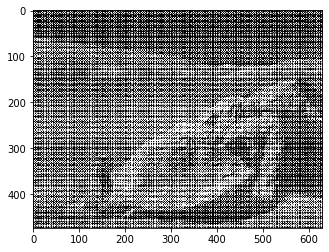

In [2]:
img = io.imread('pictures/moonman.png')
plt.imshow(img, cmap='gray')

In [3]:
from scipy import fftpack
from matplotlib.colors import LogNorm

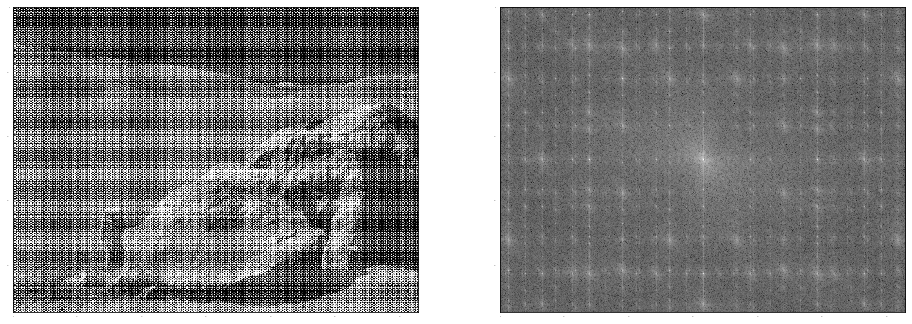

In [4]:
# img = np.hstack((np.zeros((200,100)), np.full((200,100), 255)))
img_fft = fftpack.fft2(img) # прямое преобразование Фурье
img_fft_mod = np.abs(img_fft) # спектр Фурье образа это модуль от Фурье образа
img_fft_shifted = fftpack.fftshift(img_fft) # центрирование Фурье образа
fig = plt.figure(figsize=(16,8))
# fig.patch.set_facecolor('gray')

plt.subplot(1,2,2)

plt.imshow(np.abs(img_fft_shifted), norm=LogNorm(), cmap='gray')
# plt.axis('off')
plt.tick_params(axis='both', which='both', length=0, labelsize=0)

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.tick_params(axis='both', which='both', length=0, labelsize=0)

(474, 630)

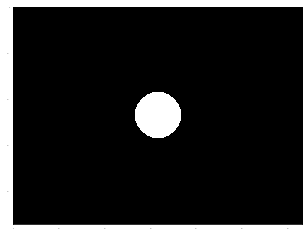

In [5]:
# вычисляем передаточную функцию
y = np.linspace(-237, 237, 474)
x = np.linspace(-315, 315, 630)
a, b = np.meshgrid(x,y)
x0, y0 = 0,0
d = np.sqrt((a-x0)**2+(b-y0)**2)
d0 = 50 # частота среза

h = (d<d0)*255 # передаточная функция

plt.imshow(h, cmap='gray')
plt.tick_params(axis='both', which='both', length=0, labelsize=0)
h.shape

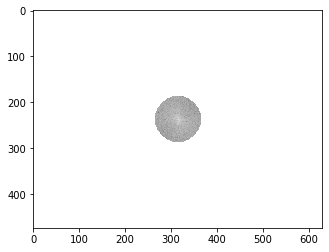

In [6]:
g_fft_shifted = img_fft_shifted * h # умножение Фурье-образа на передаточную функцию
plt.imshow(np.abs(g_fft_shifted), norm=LogNorm(vmin=5), cmap='gray')

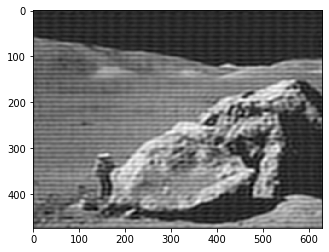

In [7]:
g_fft = fftpack.ifftshift(g_fft_shifted) # обратное смещение
g = fftpack.ifft2(g_fft).real # применяем обратное преобразования Фурье и извлекаем его действительную часть
plt.imshow(g, cmap='gray')